<a href="https://colab.research.google.com/github/JvNeo/Data-Science/blob/main/Alura_Challenge_Data_Science.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
url = 'https://raw.githubusercontent.com/sthemonica/alura-voz/refs/heads/main/Dados/Telco-Customer-Churn.json'

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

dados = pd.read_json(url)
dados.head()

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


In [2]:
dados_customer = pd.json_normalize(dados['customer'])
dados = dados.drop(columns='customer').join(dados_customer)
dados.head()

,customerID,Churn,phone,internet,account,gender,SeniorCitizen,Partner,Dependents,tenure
0,0002-ORFBO,No,"{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '...",Female,0,Yes,Yes,9
1,0003-MKNFE,No,"{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli...",Male,0,No,No,9
2,0004-TLHLJ,Yes,"{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli...",Male,0,No,No,4
3,0011-IGKFF,Yes,"{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli...",Male,1,Yes,No,13
4,0013-EXCHZ,Yes,"{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli...",Female,1,Yes,No,3


In [3]:
dados_phone = pd.json_normalize(dados['phone'])
dados = dados.drop(columns='phone').join(dados_phone)
dados_internet = pd.json_normalize(dados['internet'])
dados = dados.drop(columns='internet').join(dados_internet)
dados_account = pd.json_normalize(dados['account'])
dados = dados.drop(columns='account').join(dados_account)
dados.head()

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


In [4]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7267 non-null   object 
 1   Churn             7267 non-null   object 
 2   gender            7267 non-null   object 
 3   SeniorCitizen     7267 non-null   int64  
 4   Partner           7267 non-null   object 
 5   Dependents        7267 non-null   object 
 6   tenure            7267 non-null   int64  
 7   PhoneService      7267 non-null   object 
 8   MultipleLines     7267 non-null   object 
 9   InternetService   7267 non-null   object 
 10  OnlineSecurity    7267 non-null   object 
 11  OnlineBackup      7267 non-null   object 
 12  DeviceProtection  7267 non-null   object 
 13  TechSupport       7267 non-null   object 
 14  StreamingTV       7267 non-null   object 
 15  StreamingMovies   7267 non-null   object 
 16  Contract          7267 non-null   object 


In [5]:
dados.columns

Index(['customerID', 'Churn', 'gender', 'SeniorCitizen', 'Partner',
       'Dependents', 'tenure', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'Charges.Monthly',
       'Charges.Total'],
      dtype='object')

In [6]:
dados = dados.rename(columns={
    'customerID': 'clienteID',
    'Churn': 'churn',
    'gender': 'genero',
    'SeniorCitizen': 'Cidadao_Idoso',
    'Partner': 'Parceria',
    'Dependents': 'Dependentes',
    'tenure': 'Posse',
    'PhoneService': 'Servico_Telefonico',
    'MultipleLines': 'Varias_Linhas',
    'InternetService': 'Servico_de_Internet',
    'OnlineSecurity': 'Seguranca_Online',
    'OnlineBackup': 'Backup_Online',
    'DeviceProtection': 'Protecao_de_Dispositivo',
    'TechSupport': 'Suporte_Tecnico',
    'StreamingTV': 'Streaming_TV',
    'StreamingMovies': 'Streaming_Filmes',
    'Contract': 'Contrato',
    'PaperlessBilling': 'Faturamento_Sem_Papel',
    'PaymentMethod': 'Metodo_de_Pagamento',
    'Charges.Monthly': 'Encargos.Mensal',
    'Charges.Total': 'Encargos.Total'
})

dados.head()

,clienteID,churn,genero,Cidadao_Idoso,Parceria,Dependentes,Posse,Servico_Telefonico,Varias_Linhas,Servico_de_Internet,...,Backup_Online,Protecao_de_Dispositivo,Suporte_Tecnico,Streaming_TV,Streaming_Filmes,Contrato,Faturamento_Sem_Papel,Metodo_de_Pagamento,Encargos.Mensal,Encargos.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


In [7]:
dados[dados['Encargos.Total'] == ' ']['Contrato']

,Contrato
975,Two year
1775,Two year
1955,Two year
2075,One year
2232,Two year
2308,Two year
2930,Two year
3134,Two year
3203,Two year
4169,Two year


In [8]:
dados.loc[2075]

,2075
clienteID,2923-ARZLG
churn,No
genero,Male
Cidadao_Idoso,0
Parceria,Yes
Dependentes,Yes
Posse,0
Servico_Telefonico,Yes
Varias_Linhas,No
Servico_de_Internet,No


In [9]:
novo_valor = (dados.loc[2075, 'Encargos.Mensal']) * 12
dados.loc[2075, 'Encargos.Total'] = novo_valor
dados.loc[2075]

,2075
clienteID,2923-ARZLG
churn,No
genero,Male
Cidadao_Idoso,0
Parceria,Yes
Dependentes,Yes
Posse,0
Servico_Telefonico,Yes
Varias_Linhas,No
Servico_de_Internet,No


In [10]:
dados_idx = dados[dados['Encargos.Total'] == ' ']['Contrato'].index
dados_idx

Index([975, 1775, 1955, 2232, 2308, 2930, 3134, 3203, 4169, 5599], dtype='int64')

In [11]:
novo_valor = (dados.loc[dados_idx, 'Encargos.Mensal']) * 24
dados.loc[dados_idx, 'Encargos.Total'] = novo_valor
dados.loc[dados_idx]

,clienteID,churn,genero,Cidadao_Idoso,Parceria,Dependentes,Posse,Servico_Telefonico,Varias_Linhas,Servico_de_Internet,...,Backup_Online,Protecao_de_Dispositivo,Suporte_Tecnico,Streaming_TV,Streaming_Filmes,Contrato,Faturamento_Sem_Papel,Metodo_de_Pagamento,Encargos.Mensal,Encargos.Total
975,1371-DWPAZ,No,Female,0,Yes,Yes,0,No,No phone service,DSL,...,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,1345.2
1775,2520-SGTTA,No,Female,0,Yes,Yes,0,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,480.0
1955,2775-SEFEE,No,Male,0,No,Yes,0,Yes,Yes,DSL,...,Yes,No,Yes,No,No,Two year,Yes,Bank transfer (automatic),61.90,1485.6
2232,3115-CZMZD,No,Male,0,No,Yes,0,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,486.0
2308,3213-VVOLG,No,Male,0,Yes,Yes,0,Yes,Yes,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,608.4
2930,4075-WKNIU,No,Female,0,Yes,Yes,0,Yes,Yes,DSL,...,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,1760.4
3134,4367-NUYAO,No,Male,0,Yes,Yes,0,Yes,Yes,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,618.0
3203,4472-LVYGI,No,Female,0,Yes,Yes,0,No,No phone service,DSL,...,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,1261.2
4169,5709-LVOEQ,No,Female,0,Yes,Yes,0,Yes,No,DSL,...,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,1940.4
5599,7644-OMVMY,No,Male,0,Yes,Yes,0,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,476.4


In [12]:
dados.head()

,clienteID,churn,genero,Cidadao_Idoso,Parceria,Dependentes,Posse,Servico_Telefonico,Varias_Linhas,Servico_de_Internet,...,Backup_Online,Protecao_de_Dispositivo,Suporte_Tecnico,Streaming_TV,Streaming_Filmes,Contrato,Faturamento_Sem_Papel,Metodo_de_Pagamento,Encargos.Mensal,Encargos.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


In [13]:
dados[dados['Encargos.Total'] == ' ']

,clienteID,churn,genero,Cidadao_Idoso,Parceria,Dependentes,Posse,Servico_Telefonico,Varias_Linhas,Servico_de_Internet,...,Backup_Online,Protecao_de_Dispositivo,Suporte_Tecnico,Streaming_TV,Streaming_Filmes,Contrato,Faturamento_Sem_Papel,Metodo_de_Pagamento,Encargos.Mensal,Encargos.Total


In [14]:
dados.head()

,clienteID,churn,genero,Cidadao_Idoso,Parceria,Dependentes,Posse,Servico_Telefonico,Varias_Linhas,Servico_de_Internet,...,Backup_Online,Protecao_de_Dispositivo,Suporte_Tecnico,Streaming_TV,Streaming_Filmes,Contrato,Faturamento_Sem_Papel,Metodo_de_Pagamento,Encargos.Mensal,Encargos.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


In [15]:
dados_sem_churn_vazio = dados[dados['churn'] != ''].copy()

In [16]:
dados_sem_churn_vazio[dados_sem_churn_vazio['churn'] == '']

,clienteID,churn,genero,Cidadao_Idoso,Parceria,Dependentes,Posse,Servico_Telefonico,Varias_Linhas,Servico_de_Internet,...,Backup_Online,Protecao_de_Dispositivo,Suporte_Tecnico,Streaming_TV,Streaming_Filmes,Contrato,Faturamento_Sem_Papel,Metodo_de_Pagamento,Encargos.Mensal,Encargos.Total


In [17]:
dados_sem_churn_vazio.reset_index(drop=True, inplace=True)

In [18]:
dados_sem_churn_vazio

,clienteID,churn,genero,Cidadao_Idoso,Parceria,Dependentes,Posse,Servico_Telefonico,Varias_Linhas,Servico_de_Internet,...,Backup_Online,Protecao_de_Dispositivo,Suporte_Tecnico,Streaming_TV,Streaming_Filmes,Contrato,Faturamento_Sem_Papel,Metodo_de_Pagamento,Encargos.Mensal,Encargos.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.60,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.90,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.90,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.00,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.90,267.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,9987-LUTYD,No,Female,0,No,No,13,Yes,No,DSL,...,No,No,Yes,No,No,One year,No,Mailed check,55.15,742.9
7039,9992-RRAMN,Yes,Male,0,Yes,No,22,Yes,Yes,Fiber optic,...,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,85.10,1873.7
7040,9992-UJOEL,No,Male,0,No,No,2,Yes,No,DSL,...,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,50.30,92.75
7041,9993-LHIEB,No,Male,0,Yes,Yes,67,Yes,No,DSL,...,No,Yes,Yes,No,Yes,Two year,No,Mailed check,67.85,4627.65


In [19]:
dados2 = dados_sem_churn_vazio.copy()

In [20]:
dados2.duplicated().sum()

np.int64(0)

In [21]:
dados2.isna().sum()

,0
clienteID,0
churn,0
genero,0
Cidadao_Idoso,0
Parceria,0
Dependentes,0
Posse,0
Servico_Telefonico,0
Varias_Linhas,0
Servico_de_Internet,0


In [22]:
dados2[dados2['Dependentes'] == '']

,clienteID,churn,genero,Cidadao_Idoso,Parceria,Dependentes,Posse,Servico_Telefonico,Varias_Linhas,Servico_de_Internet,...,Backup_Online,Protecao_de_Dispositivo,Suporte_Tecnico,Streaming_TV,Streaming_Filmes,Contrato,Faturamento_Sem_Papel,Metodo_de_Pagamento,Encargos.Mensal,Encargos.Total


In [23]:
dados2.head()

,clienteID,churn,genero,Cidadao_Idoso,Parceria,Dependentes,Posse,Servico_Telefonico,Varias_Linhas,Servico_de_Internet,...,Backup_Online,Protecao_de_Dispositivo,Suporte_Tecnico,Streaming_TV,Streaming_Filmes,Contrato,Faturamento_Sem_Papel,Metodo_de_Pagamento,Encargos.Mensal,Encargos.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


In [24]:
dados2.describe()

,Cidadao_Idoso,Posse,Encargos.Mensal
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [45]:
for col in dados2.columns:
  print(f'Coluna: {col}')
  print(dados2[col].unique())
  print('-' * 30)

Coluna: clienteID
['0002-ORFBO' '0003-MKNFE' '0004-TLHLJ' ... '9992-UJOEL' '9993-LHIEB'
 '9995-HOTOH']
------------------------------
Coluna: churn
[0 1]
------------------------------
Coluna: genero
[1 0]
------------------------------
Coluna: Cidadao_Idoso
[0 1]
------------------------------
Coluna: Parceria
[1 0]
------------------------------
Coluna: Dependentes
[1 0]
------------------------------
Coluna: Posse
[ 9  4 13  3 71 63  7 65 54 72  5 56 34  1 45 50 23 55 26 69 37 49 66 67
 20 43 59 12 27  2 25 29 14 35 64 39 40 11  6 30 70 57 58 16 32 33 10 21
 61 15 44 22 24 19 47 62 46 52  8 60 48 28 41 53 68 31 36 17 18 51 38 42
  0]
------------------------------
Coluna: Servico_Telefonico
[1 0]
------------------------------
Coluna: Varias_Linhas
['Não' 'Sim' 'Sem serviço de telefone']
------------------------------
Coluna: Servico_de_Internet
['DSL' 'Fibra Otica' 'Não']
------------------------------
Coluna: Seguranca_Online
['Não' 'Sim' 'Sem Serviço de internet']
---------------

In [26]:
colunas = ['churn', 'genero', 'Cidadao_Idoso', 'Parceria', 'Dependentes', 'Servico_Telefonico', 'Faturamento_Sem_Papel']
mapeamento = {
    'No': 0,
    'Yes': 1,
    'Male': 0,
    'Female': 1
}

dados2[colunas] = dados2[colunas].replace(mapeamento)
dados2.head()

<ipython-input-26-b82ef6ef4bae>:9: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dados2[colunas] = dados2[colunas].replace(mapeamento)


,clienteID,churn,genero,Cidadao_Idoso,Parceria,Dependentes,Posse,Servico_Telefonico,Varias_Linhas,Servico_de_Internet,...,Backup_Online,Protecao_de_Dispositivo,Suporte_Tecnico,Streaming_TV,Streaming_Filmes,Contrato,Faturamento_Sem_Papel,Metodo_de_Pagamento,Encargos.Mensal,Encargos.Total
0,0002-ORFBO,0,1,0,1,1,9,1,No,DSL,...,Yes,No,Yes,Yes,No,One year,1,Mailed check,65.6,593.3
1,0003-MKNFE,0,0,0,0,0,9,1,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,0,Mailed check,59.9,542.4
2,0004-TLHLJ,1,0,0,0,0,4,1,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,1,Electronic check,73.9,280.85
3,0011-IGKFF,1,0,1,1,0,13,1,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,1,Electronic check,98.0,1237.85
4,0013-EXCHZ,1,1,1,1,0,3,1,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,1,Mailed check,83.9,267.4


In [27]:
for col in dados2.columns:
  print(f'Coluna: {col}')
  print(dados2[col].unique())
  print('-' * 30)

Coluna: clienteID
['0002-ORFBO' '0003-MKNFE' '0004-TLHLJ' ... '9992-UJOEL' '9993-LHIEB'
 '9995-HOTOH']
------------------------------
Coluna: churn
[0 1]
------------------------------
Coluna: genero
[1 0]
------------------------------
Coluna: Cidadao_Idoso
[0 1]
------------------------------
Coluna: Parceria
[1 0]
------------------------------
Coluna: Dependentes
[1 0]
------------------------------
Coluna: Posse
[ 9  4 13  3 71 63  7 65 54 72  5 56 34  1 45 50 23 55 26 69 37 49 66 67
 20 43 59 12 27  2 25 29 14 35 64 39 40 11  6 30 70 57 58 16 32 33 10 21
 61 15 44 22 24 19 47 62 46 52  8 60 48 28 41 53 68 31 36 17 18 51 38 42
  0]
------------------------------
Coluna: Servico_Telefonico
[1 0]
------------------------------
Coluna: Varias_Linhas
['No' 'Yes' 'No phone service']
------------------------------
Coluna: Servico_de_Internet
['DSL' 'Fiber optic' 'No']
------------------------------
Coluna: Seguranca_Online
['No' 'Yes' 'No internet service']
-----------------------------

In [28]:
traducao = {
    'Yes': 'Sim',
    'No': 'Não',
    'No phone service': 'Sem serviço de telefone',
    'Fiber optic': 'Fibra Otica',
    'No internet service': 'Sem Serviço de internet',
    'One year': 'Um Ano',
    'Month-to-month': 'Mes a Mes',
    'Two year': 'Dois anos',
    'Mailed check': 'Cheque enviado pelo correio',
    'Electronic check': 'Correio eletrônico',
    'Credit card (automatic)': 'Cartão de crédito(automático)',
    'Bank transfer (automatic)': 'Transferência bancária(automática)'
}

dados2.replace(traducao, inplace=True)

In [29]:
dados2.head()

,clienteID,churn,genero,Cidadao_Idoso,Parceria,Dependentes,Posse,Servico_Telefonico,Varias_Linhas,Servico_de_Internet,...,Backup_Online,Protecao_de_Dispositivo,Suporte_Tecnico,Streaming_TV,Streaming_Filmes,Contrato,Faturamento_Sem_Papel,Metodo_de_Pagamento,Encargos.Mensal,Encargos.Total
0,0002-ORFBO,0,1,0,1,1,9,1,Não,DSL,...,Sim,Não,Sim,Sim,Não,Um Ano,1,Cheque enviado pelo correio,65.6,593.3
1,0003-MKNFE,0,0,0,0,0,9,1,Sim,DSL,...,Não,Não,Não,Não,Sim,Mes a Mes,0,Cheque enviado pelo correio,59.9,542.4
2,0004-TLHLJ,1,0,0,0,0,4,1,Não,Fibra Otica,...,Não,Sim,Não,Não,Não,Mes a Mes,1,Correio eletrônico,73.9,280.85
3,0011-IGKFF,1,0,1,1,0,13,1,Não,Fibra Otica,...,Sim,Sim,Não,Sim,Sim,Mes a Mes,1,Correio eletrônico,98.0,1237.85
4,0013-EXCHZ,1,1,1,1,0,3,1,Não,Fibra Otica,...,Não,Não,Sim,Sim,Não,Mes a Mes,1,Cheque enviado pelo correio,83.9,267.4


In [30]:
dados2.to_json('dados2.json')

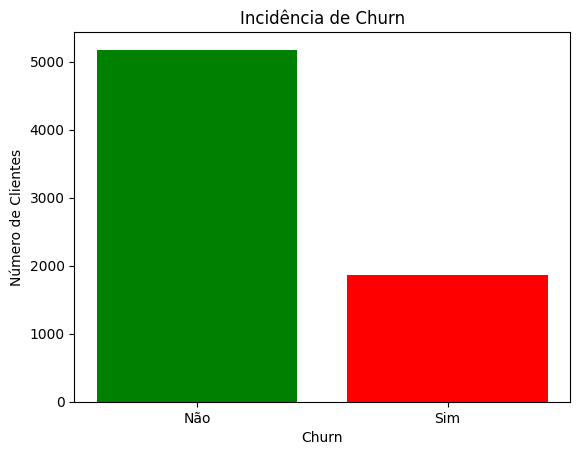

In [31]:
# realizando uma contagem dos valores de Churn usando o .value_counts()
# sendo 0 Não e 1 Sim
# sort_index utilizado apenas para organização da ordem, 0 antes do 1 para manter a ordem lógica não -> sim
contagem = dados2['churn'].value_counts().sort_index()

# criação das labels para o gráfico
labels = ['Não', 'Sim']

#criação do gráfico
plt.bar(labels, contagem, color = ['green', 'red'])
plt.title('Incidência de Churn')
plt.xlabel('Churn')
plt.ylabel('Número de Clientes')
plt.show()

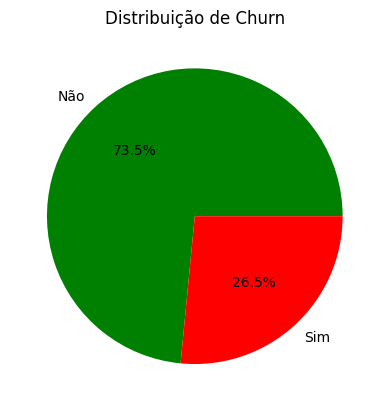

In [32]:
# uma visualização de gráfico pizza e porcentagem
contagem.plot.pie(labels=labels, autopct='%1.1f%%', colors=['green', 'red'])
plt.title('Distribuição de Churn')
plt.ylabel('')
plt.show()

In [33]:
dados2.head()

,clienteID,churn,genero,Cidadao_Idoso,Parceria,Dependentes,Posse,Servico_Telefonico,Varias_Linhas,Servico_de_Internet,...,Backup_Online,Protecao_de_Dispositivo,Suporte_Tecnico,Streaming_TV,Streaming_Filmes,Contrato,Faturamento_Sem_Papel,Metodo_de_Pagamento,Encargos.Mensal,Encargos.Total
0,0002-ORFBO,0,1,0,1,1,9,1,Não,DSL,...,Sim,Não,Sim,Sim,Não,Um Ano,1,Cheque enviado pelo correio,65.6,593.3
1,0003-MKNFE,0,0,0,0,0,9,1,Sim,DSL,...,Não,Não,Não,Não,Sim,Mes a Mes,0,Cheque enviado pelo correio,59.9,542.4
2,0004-TLHLJ,1,0,0,0,0,4,1,Não,Fibra Otica,...,Não,Sim,Não,Não,Não,Mes a Mes,1,Correio eletrônico,73.9,280.85
3,0011-IGKFF,1,0,1,1,0,13,1,Não,Fibra Otica,...,Sim,Sim,Não,Sim,Sim,Mes a Mes,1,Correio eletrônico,98.0,1237.85
4,0013-EXCHZ,1,1,1,1,0,3,1,Não,Fibra Otica,...,Não,Não,Sim,Sim,Não,Mes a Mes,1,Cheque enviado pelo correio,83.9,267.4


<ipython-input-46-c465d0489cb5>:14: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['Com Serviço', 'Sem Serviço'])


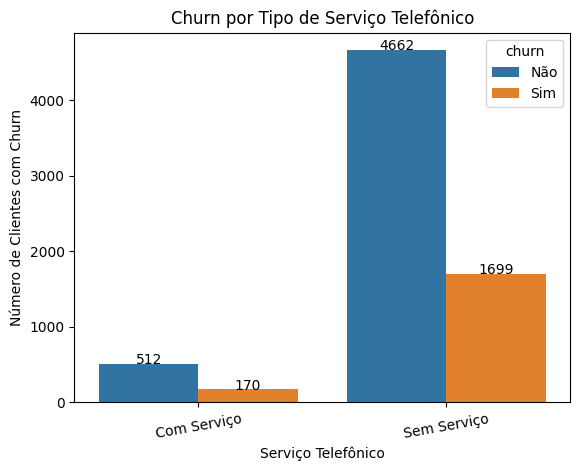

In [46]:
# Plot básico
ax = sns.countplot(data=dados2,x='Servico_Telefonico',hue='churn')
for p in ax.patches:
    altura = p.get_height()
    if altura > 0:
        ax.text(p.get_x() + p.get_width() / 2., altura + 1,
                f'{int(altura)}', ha='center', fontsize=10)
# Título e eixos
plt.title('Churn por Tipo de Serviço Telefônico')
plt.xlabel('Serviço Telefônico')
plt.ylabel('Número de Clientes com Churn')
plt.legend(title='churn',labels=['Não','Sim'])
# Substituir os labels do eixo X
ax.set_xticklabels(['Com Serviço', 'Sem Serviço'])
# Ajuste visual
plt.xticks(rotation=10)
plt.show()

In [48]:
dados2['churn'].unique()

array([0, 1])

<ipython-input-67-b4e16036101c>:13: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['Feminino', 'Masculino'])


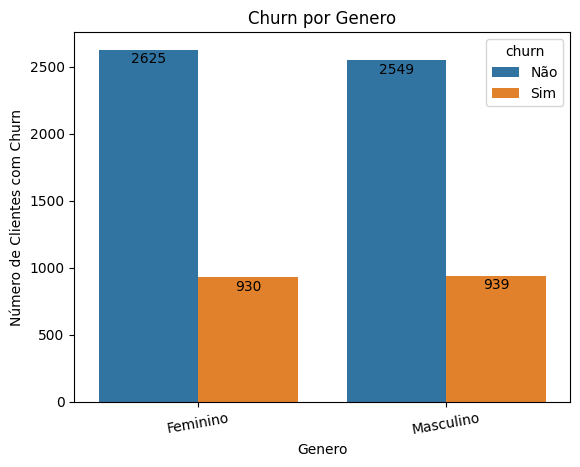

In [67]:
# tenho que ajustar este

ax = sns.countplot(data=dados2 , x='genero', hue = 'churn')
for p in ax.patches:
  altura = p.get_height()
  if altura > 0:
      ax.text(p.get_x() + p.get_width() / 2.,altura - 100,
              f'{int(altura)}', ha= 'center', fontsize=10)
plt.title('Churn por Genero')
plt.xlabel('Genero')
plt.ylabel('Número de Clientes com Churn')
plt.legend(title='churn',labels=['Não','Sim'])
ax.set_xticklabels(['Feminino', 'Masculino'])
plt.xticks(rotation=10)
plt.show()

In [37]:
dados2['Encargos.Total'] = dados2['Encargos.Total'].astype(float)

In [38]:
dados2.dtypes

,0
clienteID,object
churn,int64
genero,int64
Cidadao_Idoso,int64
Parceria,int64
Dependentes,int64
Posse,int64
Servico_Telefonico,int64
Varias_Linhas,object
Servico_de_Internet,object


In [39]:
dados2.head()

,clienteID,churn,genero,Cidadao_Idoso,Parceria,Dependentes,Posse,Servico_Telefonico,Varias_Linhas,Servico_de_Internet,...,Backup_Online,Protecao_de_Dispositivo,Suporte_Tecnico,Streaming_TV,Streaming_Filmes,Contrato,Faturamento_Sem_Papel,Metodo_de_Pagamento,Encargos.Mensal,Encargos.Total
0,0002-ORFBO,0,1,0,1,1,9,1,Não,DSL,...,Sim,Não,Sim,Sim,Não,Um Ano,1,Cheque enviado pelo correio,65.6,593.30
1,0003-MKNFE,0,0,0,0,0,9,1,Sim,DSL,...,Não,Não,Não,Não,Sim,Mes a Mes,0,Cheque enviado pelo correio,59.9,542.40
2,0004-TLHLJ,1,0,0,0,0,4,1,Não,Fibra Otica,...,Não,Sim,Não,Não,Não,Mes a Mes,1,Correio eletrônico,73.9,280.85
3,0011-IGKFF,1,0,1,1,0,13,1,Não,Fibra Otica,...,Sim,Sim,Não,Sim,Sim,Mes a Mes,1,Correio eletrônico,98.0,1237.85
4,0013-EXCHZ,1,1,1,1,0,3,1,Não,Fibra Otica,...,Não,Não,Sim,Sim,Não,Mes a Mes,1,Cheque enviado pelo correio,83.9,267.40


In [40]:
dados2['Varias_Linhas'].unique()

array(['Não', 'Sim', 'Sem serviço de telefone'], dtype=object)

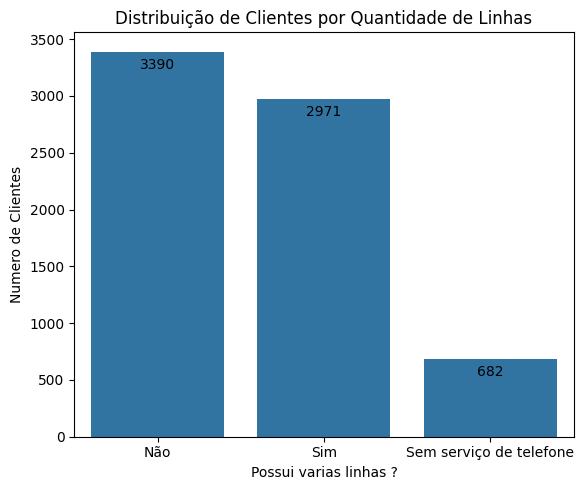

In [41]:
plt.figure(figsize=(6, 5))
ax = sns.countplot(data=dados2, x='Varias_Linhas')
for p in ax.patches:
    altura = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., altura - 150,
            f'{int(altura)}', ha='center', fontsize=10)
plt.title('Distribuição de Clientes por Quantidade de Linhas')
plt.xlabel('Possui varias linhas ?')
plt.ylabel('Numero de Clientes')
plt.tight_layout()
plt.show()

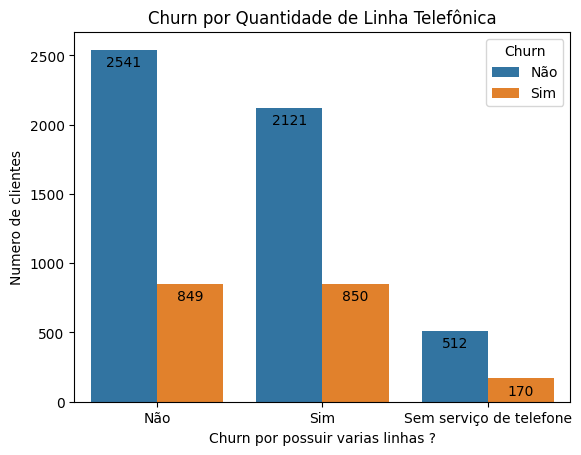

In [42]:
ax = sns.countplot(data=dados2, x='Varias_Linhas', hue='churn')
for p in ax.patches:
    altura = p.get_height()
    if altura > 0:
        ax.text(p.get_x() + p.get_width() / 2., altura - 120,
                f'{int(altura)}', ha='center', fontsize=10)
plt.title('Churn por Quantidade de Linha Telefônica')
plt.xlabel('Churn por possuir varias linhas ?')
plt.ylabel('Numero de clientes')
plt.legend(title='Churn', labels=['Não', 'Sim']) # se churn for 0 e 1
plt.show()

In [43]:
dados2.head()

,clienteID,churn,genero,Cidadao_Idoso,Parceria,Dependentes,Posse,Servico_Telefonico,Varias_Linhas,Servico_de_Internet,...,Backup_Online,Protecao_de_Dispositivo,Suporte_Tecnico,Streaming_TV,Streaming_Filmes,Contrato,Faturamento_Sem_Papel,Metodo_de_Pagamento,Encargos.Mensal,Encargos.Total
0,0002-ORFBO,0,1,0,1,1,9,1,Não,DSL,...,Sim,Não,Sim,Sim,Não,Um Ano,1,Cheque enviado pelo correio,65.6,593.30
1,0003-MKNFE,0,0,0,0,0,9,1,Sim,DSL,...,Não,Não,Não,Não,Sim,Mes a Mes,0,Cheque enviado pelo correio,59.9,542.40
2,0004-TLHLJ,1,0,0,0,0,4,1,Não,Fibra Otica,...,Não,Sim,Não,Não,Não,Mes a Mes,1,Correio eletrônico,73.9,280.85
3,0011-IGKFF,1,0,1,1,0,13,1,Não,Fibra Otica,...,Sim,Sim,Não,Sim,Sim,Mes a Mes,1,Correio eletrônico,98.0,1237.85
4,0013-EXCHZ,1,1,1,1,0,3,1,Não,Fibra Otica,...,Não,Não,Sim,Sim,Não,Mes a Mes,1,Cheque enviado pelo correio,83.9,267.40
